# <a id='toc1_'></a>[<span style="color:yellow;">Steganography Example with Camera Image</span>](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [<span style="color:yellow;">Steganography Example with Camera Image</span>](#toc1_)    
- [Step 1: Import libraries](#toc2_)    
- [Step 2: Load the camera image from scikit-image](#toc3_)    
- [Step 3: Convert to numpy array](#toc4_)    
- [Step 4: Create secret message](#toc5_)    
- [Step 5: Steganography functions with overflow protection](#toc6_)    
- [Step 6: Embed message](#toc7_)    
- [Step 7: Original vs stego image](#toc8_)    
- [Step 8: Extract message](#toc9_)    
- [Step 9: Pixel distribution (using histplot)](#toc10_)    
- [Step 10: LSB planes visualization](#toc11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Step 1: Import libraries](#toc0_)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import data  # Import scikit-image's data module

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries imported successfully!")

Libraries imported successfully!


# <a id='toc3_'></a>[Step 2: Load the camera image from scikit-image](#toc0_)

Loading sample camera image from scikit-image...


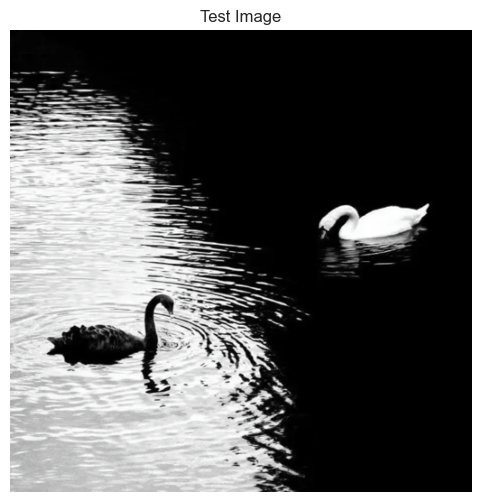

Image size: (512, 512)
Image mode: RGB


In [3]:
print("Loading sample camera image from scikit-image...")
file_path='st.png'
img = Image.open(file_path)  # Grayscale image (512x512)
img=img.resize((512,512))
if img.mode!='RGB':
    img=img.convert('RGB')

# Convert to RGB (since our steganography code expects 3 channels)


# Display the image
plt.figure()
plt.imshow(img)
plt.title('Test Image')
plt.axis('off')
plt.show()

print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")

# <a id='toc4_'></a>[Step 3: Convert to numpy array](#toc0_)

In [17]:
img_arr = np.array(img)
print(f"Numpy array shape: {img_arr.shape}")  # Should be (512, 512, 3)

Numpy array shape: (512, 512, 3)


# <a id='toc5_'></a>[Step 4: Create secret message](#toc0_)

In [18]:
message = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
print(f"\nSecret message: {message}")


Secret message: [1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1]


# <a id='toc6_'></a>[Step 5: Steganography functions with overflow protection](#toc0_)

In [19]:
def embed_message(image_array, message):
    """Embed message into LSB of red channel (overflow-safe)."""
    flat_img = image_array.reshape(-1, 3).copy()
    
    if len(message) > len(flat_img):
        raise ValueError(f"Message too large for image")
    
    # Use int32 to avoid overflow during operations
    red_channel = flat_img[:len(message), 0].astype(np.int32)
    
    # Vectorized embedding with modulo to stay in 0-255 range
    red_channel[message == 1] = (red_channel[message == 1] | 1) % 256
    red_channel[message == 0] = (red_channel[message == 0] & ~1) % 256
    
    # Convert back to uint8
    flat_img[:len(message), 0] = red_channel.astype(np.uint8)
    return flat_img.reshape(image_array.shape)

def extract_message(stego_array, message_length):
    """Extract message from LSB of red channel."""
    flat_stego = stego_array.reshape(-1, 3)
    return (flat_stego[:message_length, 0] & 1).astype(np.uint8)

# <a id='toc7_'></a>[Step 6: Embed message](#toc0_)

In [20]:
print("\nEmbedding message...")
stego_arr = embed_message(img_arr, message)
stego_img = Image.fromarray(stego_arr.astype(np.uint8))


Embedding message...


# <a id='toc8_'></a>[Step 7: Original vs stego image](#toc0_)

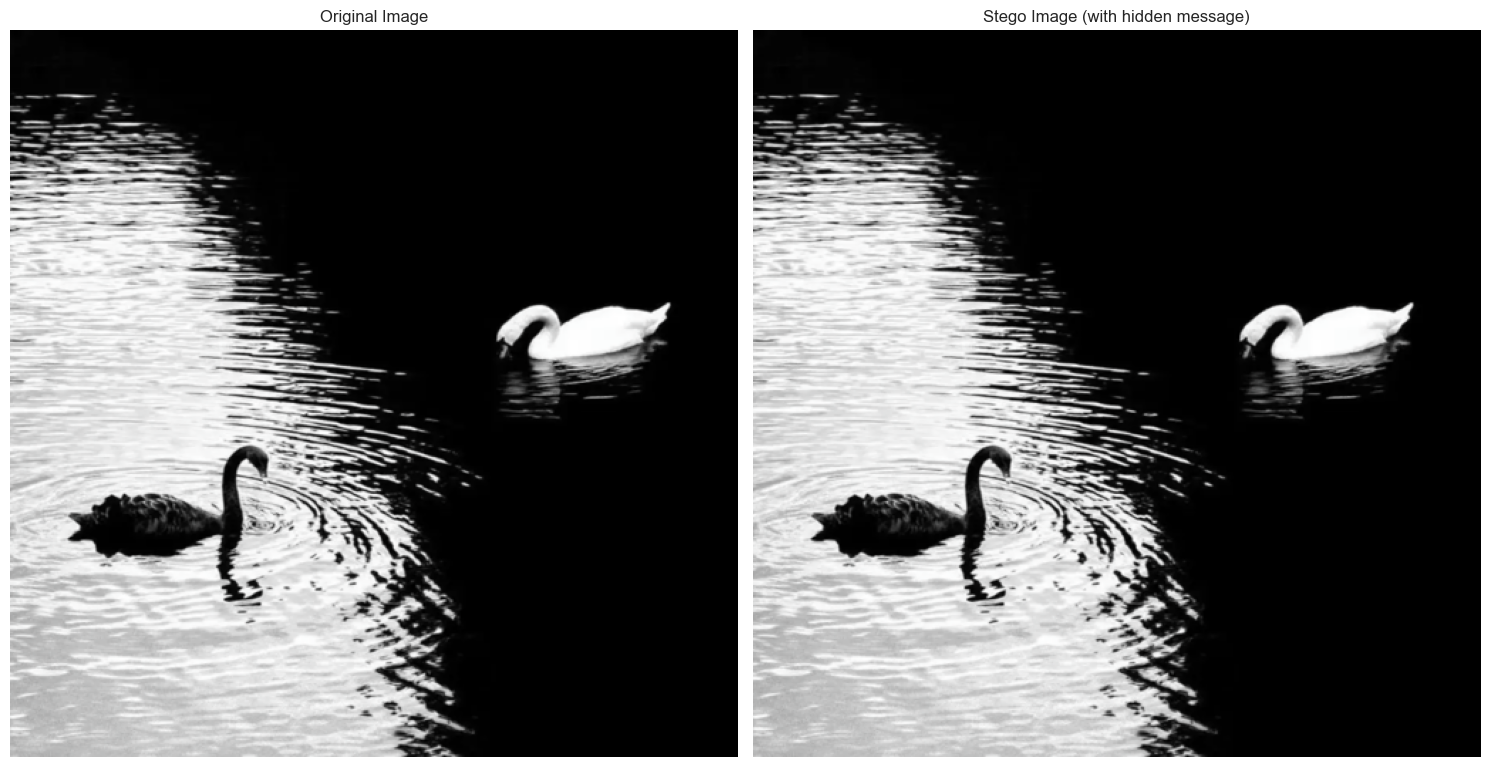

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(img)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(stego_img)
ax2.set_title('Stego Image (with hidden message)')
ax2.axis('off')

plt.tight_layout()
plt.show()

# <a id='toc9_'></a>[Step 8: Extract message](#toc0_)

In [22]:
print("\nExtracting message...")
extracted_message = extract_message(stego_arr, len(message))
print(f"Original message: {message}")
print(f"Extracted message: {extracted_message}")
print(f"Match: {np.array_equal(message, extracted_message)}")


Extracting message...
Original message: [1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1]
Extracted message: [1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1]
Match: True


# <a id='toc10_'></a>[Step 9: Pixel distribution (using histplot)](#toc0_)

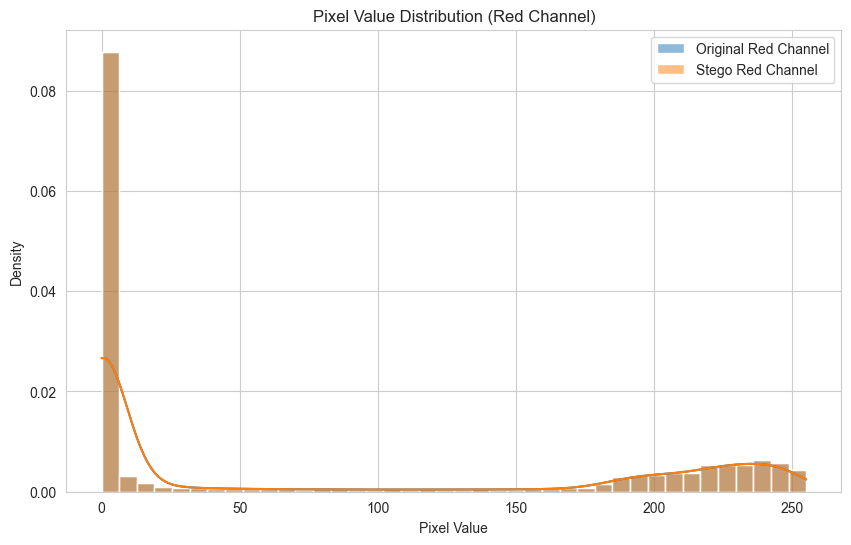

In [23]:
plt.figure()
sns.histplot(img_arr[:, :, 0].flatten(), kde=True, label='Original Red Channel', stat='density')
sns.histplot(stego_arr[:, :, 0].flatten(), kde=True, label='Stego Red Channel', stat='density')
plt.title('Pixel Value Distribution (Red Channel)')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# <a id='toc11_'></a>[Step 10: LSB planes visualization](#toc0_)

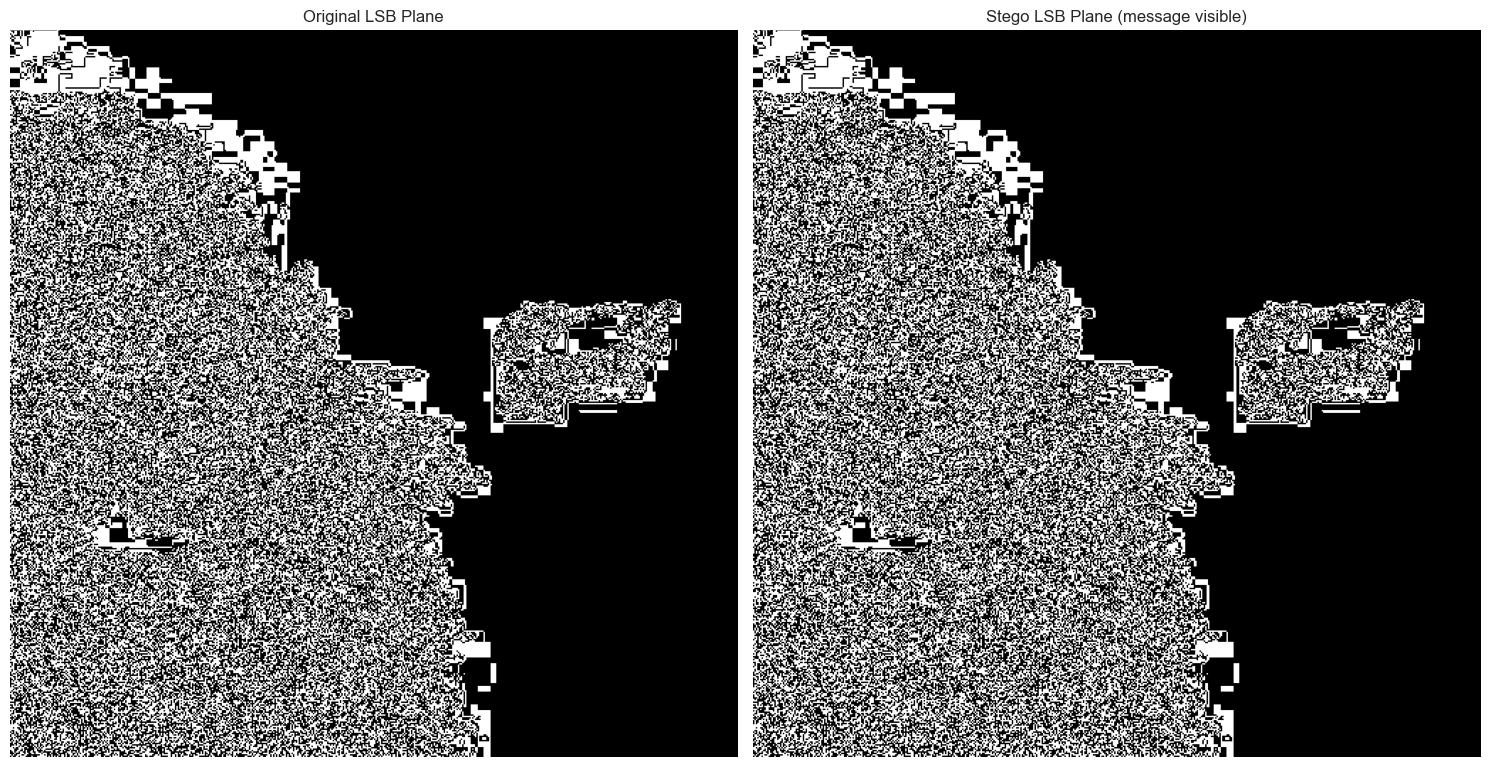


Steganography demonstration complete!


In [24]:
def get_lsb_plane(image_array):
    """Extract LSB plane of red channel."""
    red_channel = image_array[:, :, 0]
    return (red_channel & 1) * 255  # Scale to 0-255

original_lsb = get_lsb_plane(img_arr)
stego_lsb = get_lsb_plane(stego_arr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(original_lsb, cmap='gray')
ax1.set_title('Original LSB Plane')
ax1.axis('off')

ax2.imshow(stego_lsb, cmap='gray')
ax2.set_title('Stego LSB Plane (message visible)')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\nSteganography demonstration complete!")